## Setup and Load Data

In [31]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Load dataset
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset> Size: 41MB
Dimensions:    (longitude: 35, latitude: 27, time: 894)
Coordinates:
  * longitude  (longitude) float32 140B 77.6 77.7 77.8 77.9 ... 80.8 80.9 81.0
  * latitude   (latitude) float32 108B 31.3 31.2 31.1 31.0 ... 28.9 28.8 28.7
    expver     int32 4B 1
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-06-01
Data variables:
    lict       (time, latitude, longitude) float64 7MB ...
    lai_hv     (time, latitude, longitude) float64 7MB ...
    skt        (time, latitude, longitude) float64 7MB ...
    rsn        (time, latitude, longitude) float64 7MB ...
    sf         (time, latitude, longitude) float64 7MB ...
    tp         (time, latitude, longitude) float64 7MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
ds.sel(longitude=79)

<xarray.Dataset> Size: 1MB
Dimensions:    (latitude: 27, time: 894)
Coordinates:
    longitude  float32 4B 79.0
  * latitude   (latitude) float32 108B 31.3 31.2 31.1 31.0 ... 28.9 28.8 28.7
    expver     int32 4B 1
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-06-01
Data variables:
    lict       (time, latitude) float64 193kB ...
    lai_hv     (time, latitude) float64 193kB ...
    skt        (time, latitude) float64 193kB ...
    rsn        (time, latitude) float64 193kB ...
    sf         (time, latitude) float64 193kB ...
    tp         (time, latitude) float64 193kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [5]:
ds.sel(longitude=80,latitude=30,time='2023-01-01')

<xarray.Dataset> Size: 68B
Dimensions:    ()
Coordinates:
    longitude  float32 4B 80.0
    latitude   float32 4B 30.0
    expver     int32 4B 1
    time       datetime64[ns] 8B 2023-01-01
Data variables:
    lict       float64 8B ...
    lai_hv     float64 8B ...
    skt        float64 8B ...
    rsn        float64 8B ...
    sf         float64 8B ...
    tp         float64 8B ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [6]:
ds.sel(latitude=103,method='nearest')

<xarray.Dataset> Size: 2MB
Dimensions:    (longitude: 35, time: 894)
Coordinates:
  * longitude  (longitude) float32 140B 77.6 77.7 77.8 77.9 ... 80.8 80.9 81.0
    latitude   float32 4B 31.3
    expver     int32 4B 1
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-06-01
Data variables:
    lict       (time, longitude) float64 250kB ...
    lai_hv     (time, longitude) float64 250kB ...
    skt        (time, longitude) float64 250kB ...
    rsn        (time, longitude) float64 250kB ...
    sf         (time, longitude) float64 250kB ...
    tp         (time, longitude) float64 250kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [7]:
ds.sel(longitude=[79,80],latitude=[29,30])

<xarray.Dataset> Size: 179kB
Dimensions:    (longitude: 2, latitude: 2, time: 894)
Coordinates:
  * longitude  (longitude) float32 8B 79.0 80.0
  * latitude   (latitude) float32 8B 29.0 30.0
    expver     int32 4B 1
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-06-01
Data variables:
    lict       (time, latitude, longitude) float64 29kB ...
    lai_hv     (time, latitude, longitude) float64 29kB ...
    skt        (time, latitude, longitude) float64 29kB ...
    rsn        (time, latitude, longitude) float64 29kB ...
    sf         (time, latitude, longitude) float64 29kB ...
    tp         (time, latitude, longitude) float64 29kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [8]:
ds.isel(longitude=0,latitude=0)

<xarray.Dataset> Size: 50kB
Dimensions:    (time: 894)
Coordinates:
    longitude  float32 4B 77.6
    latitude   float32 4B 31.3
    expver     int32 4B 1
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-06-01
Data variables:
    lict       (time) float64 7kB ...
    lai_hv     (time) float64 7kB ...
    skt        (time) float64 7kB ...
    rsn        (time) float64 7kB ...
    sf         (time) float64 7kB ...
    tp         (time) float64 7kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-07 05:21:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

## Exploratory Data Analysis(EDA)

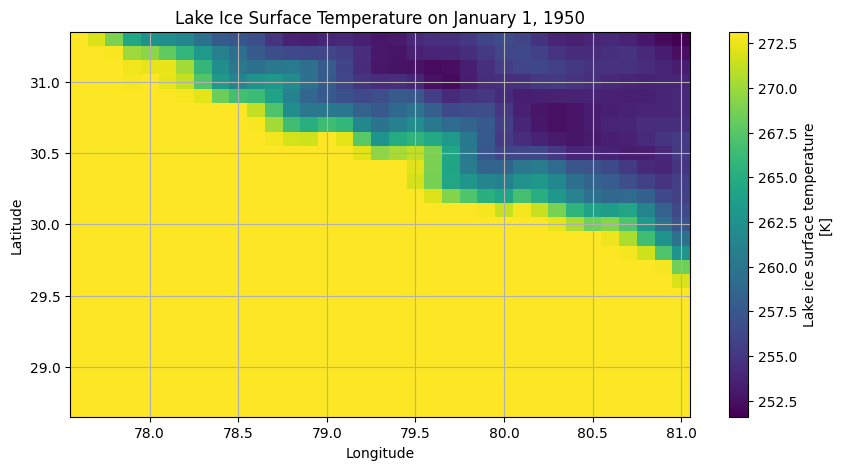

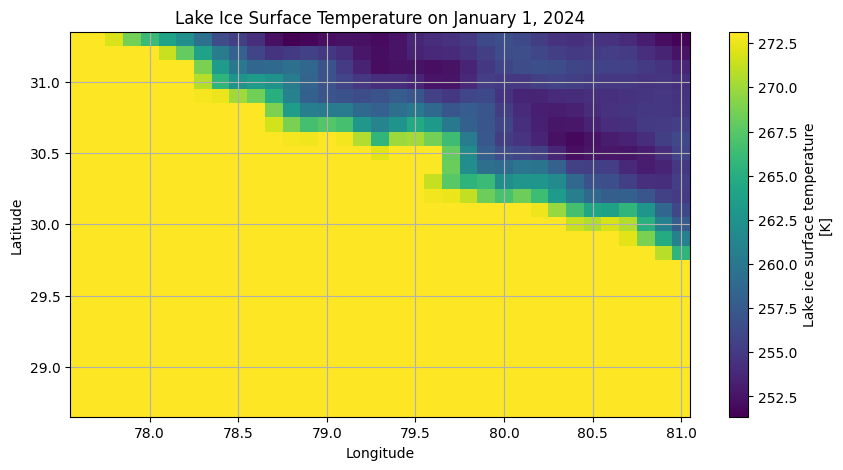

In [36]:

# Plot Lake Ice Surfacetemperature for January 1, 1950
plt.figure(figsize=(10, 5))
ds.lict.sel(time='1950-01-01').plot()
plt.title('Lake Ice Surface Temperature on January 1, 1950')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot Lake Ice Surface temperature for January 1, 2024
plt.figure(figsize=(10, 5))
ds.lict.sel(time='2024-01-01').plot()
plt.title('Lake Ice Surface Temperature on January 1, 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

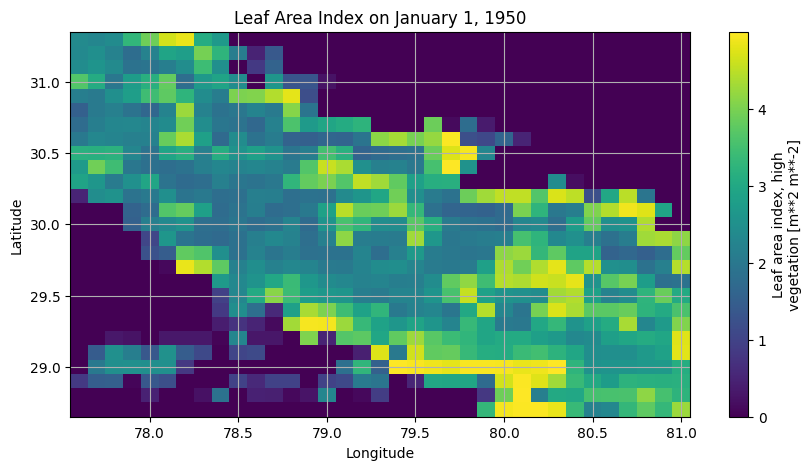

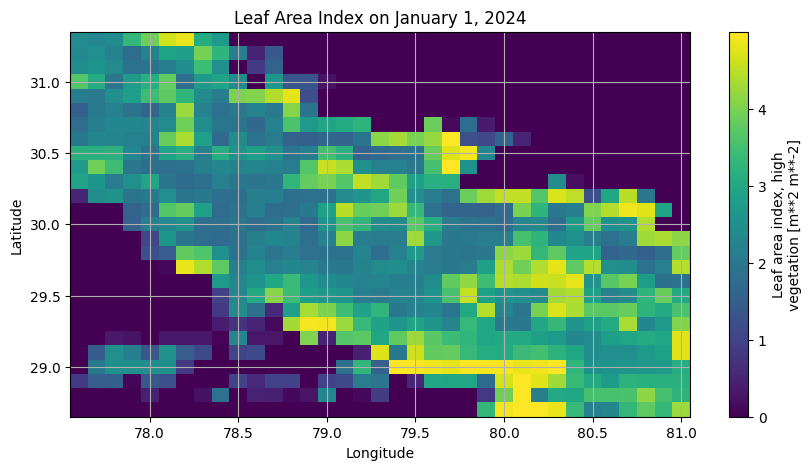

In [39]:
# Plot Leaf Area Index for January 1, 1950
plt.figure(figsize=(10, 5))
ds.lai_hv.sel(time='1950-01-01').plot()
plt.title('Leaf Area Index on January 1, 1950')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot Leaf Area Index for January 1, 2024
plt.figure(figsize=(10, 5))
ds.lai_hv.sel(time='2024-01-01').plot()
plt.title('Leaf Area Index on January 1, 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

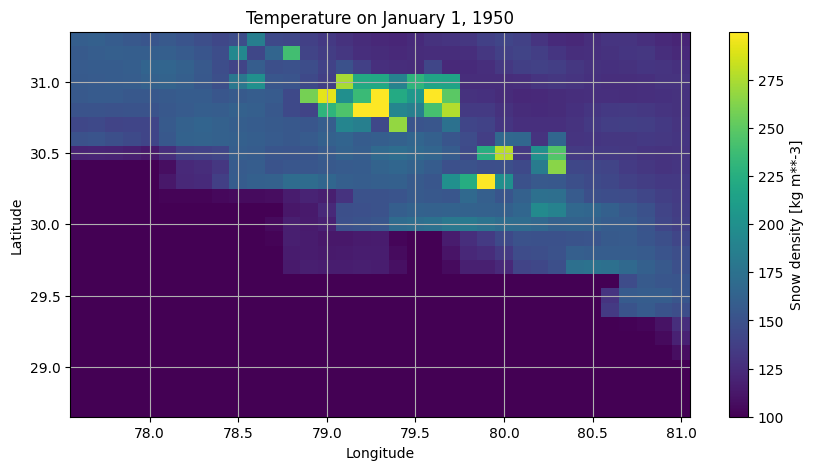

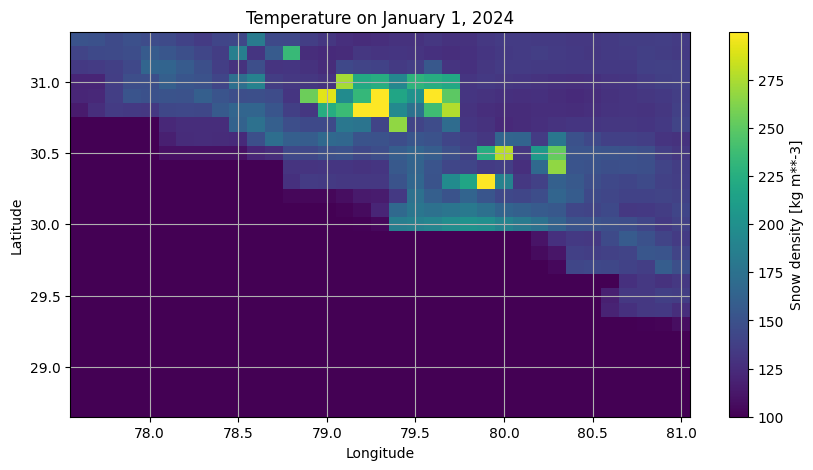

In [41]:
# Plot Snow Density for January 1, 1950
plt.figure(figsize=(10, 5))
ds.rsn.sel(time='1950-01-01').plot()
plt.title('Temperature on January 1, 1950')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot Snow Density for January 1, 2024
plt.figure(figsize=(10, 5))
ds.rsn.sel(time='2024-01-01').plot()
plt.title('Temperature on January 1, 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

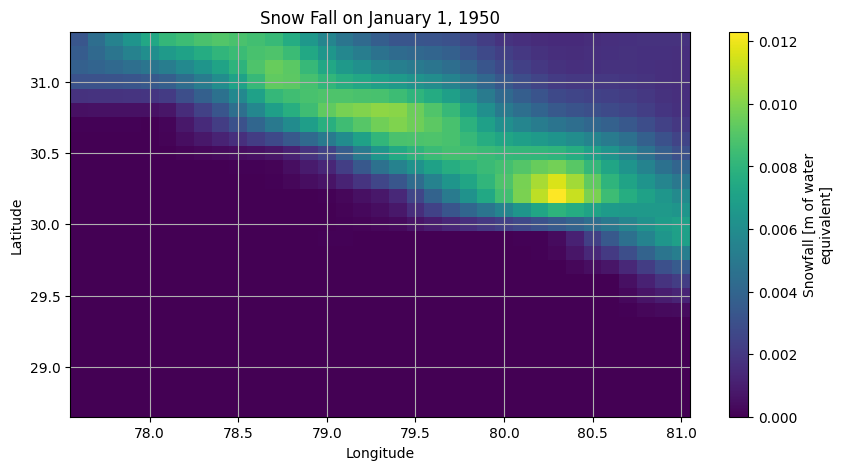

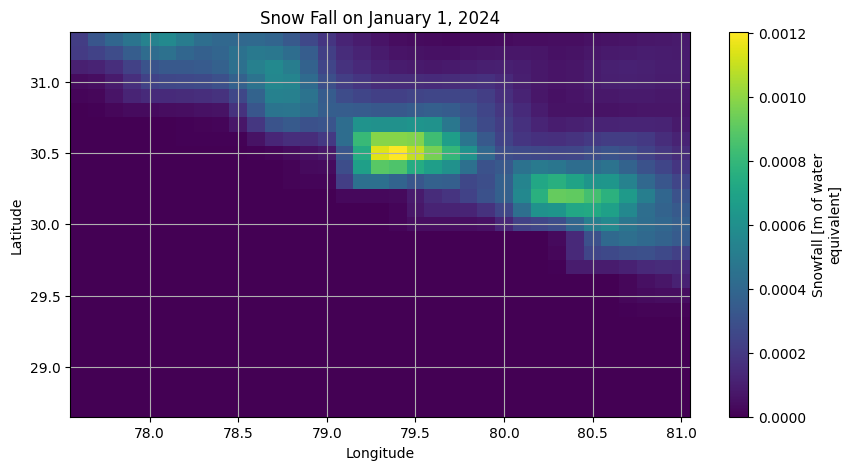

In [43]:
# Plot temperature for January 1, 1950
plt.figure(figsize=(10, 5))
ds.sf.sel(time='1950-01-01').plot()
plt.title('Snow Fall on January 1, 1950')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot temperature for January 1, 2024
plt.figure(figsize=(10, 5))
ds.sf.sel(time='2024-01-01').plot()
plt.title('Snow Fall on January 1, 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

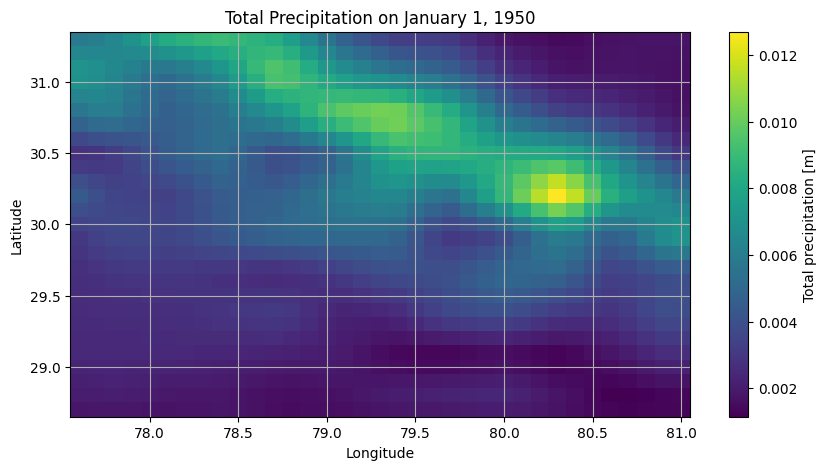

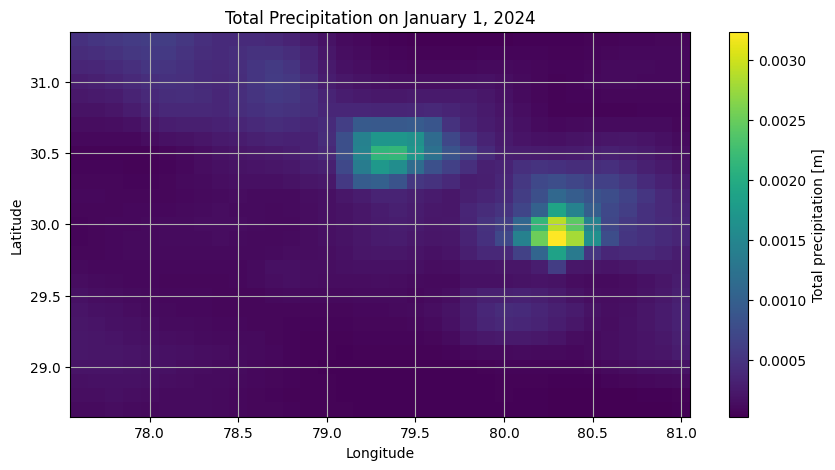

In [44]:
# Plot Total Precipitation for January 1, 1950
plt.figure(figsize=(10, 5))
ds.tp.sel(time='1950-01-01').plot()
plt.title('Total Precipitation on January 1, 1950')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot Total Precipitation for January 1, 2024
plt.figure(figsize=(10, 5))
ds.tp.sel(time='2024-01-01').plot()
plt.title('Total Precipitation on January 1, 2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

 Select and Filter data through coordinates

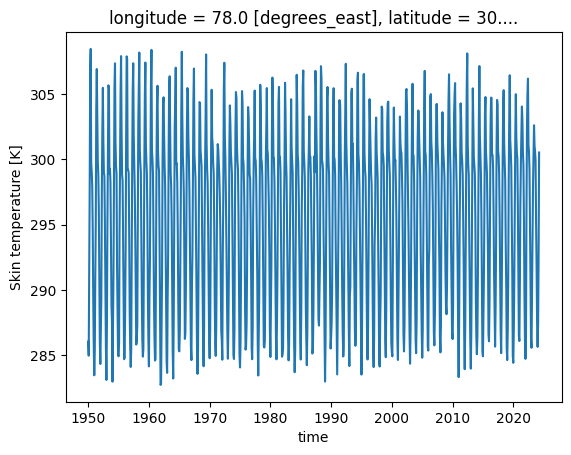

In [53]:
ds.sel(longitude=78,latitude=30).skt.plot()

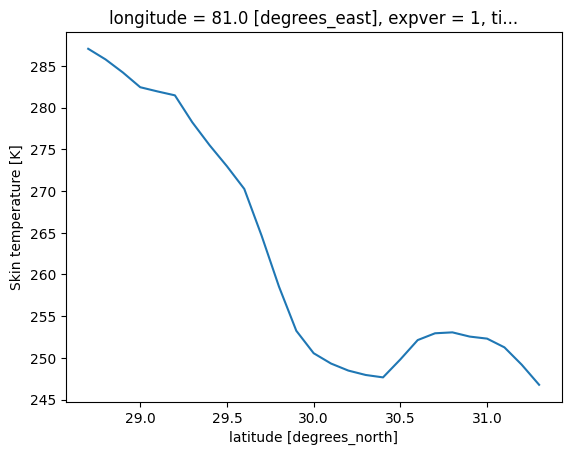

In [55]:
ds.isel(time=0).sel(longitude=90,method='nearest').skt.plot()

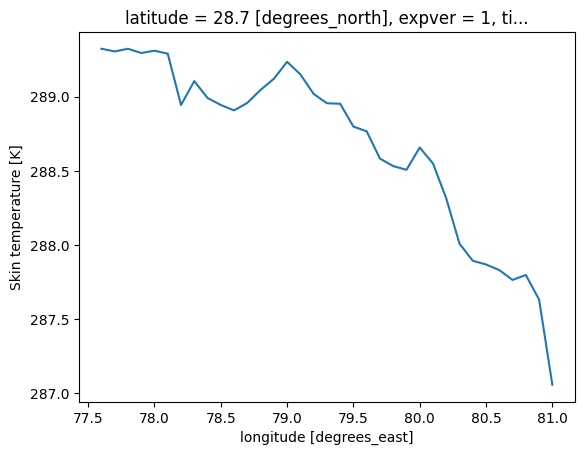

In [56]:
ds.isel(time=0).sel(latitude=25,method='nearest').skt.plot()

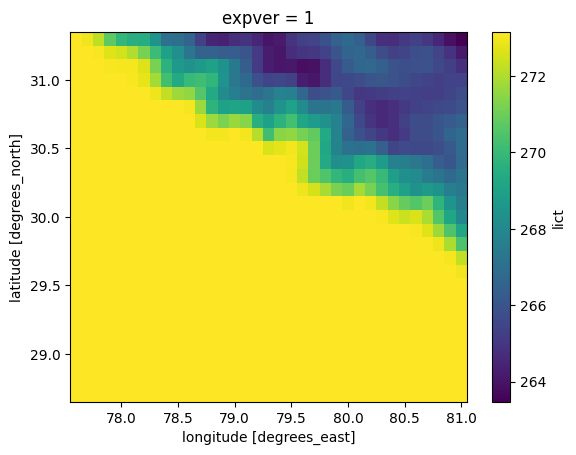

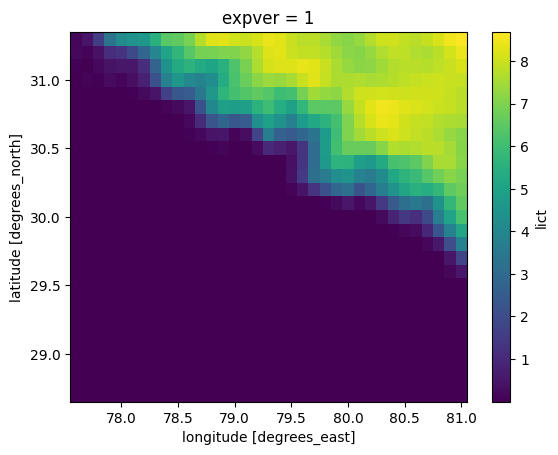

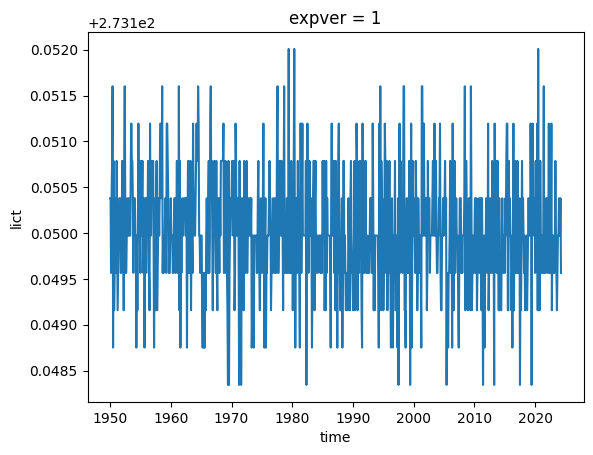

In [60]:
# Plot mean Lake Ice Suface Temperature
mean_temp = ds.lict.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of Lake Ice Suface Temperature
ds.lict.std(dim='time').plot()
plt.show()
# Plot median Lake Ice Suface Temperature over latitude and longitude
ds.lict.median(dim=['latitude', 'longitude']).plot()
plt.show()

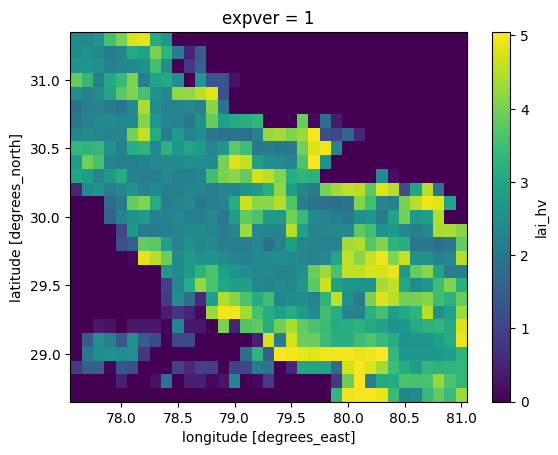

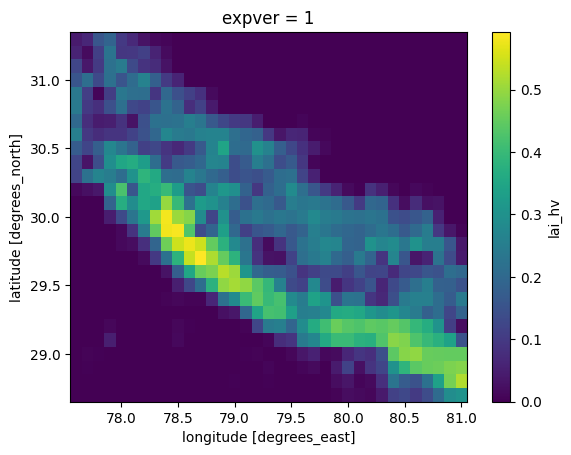

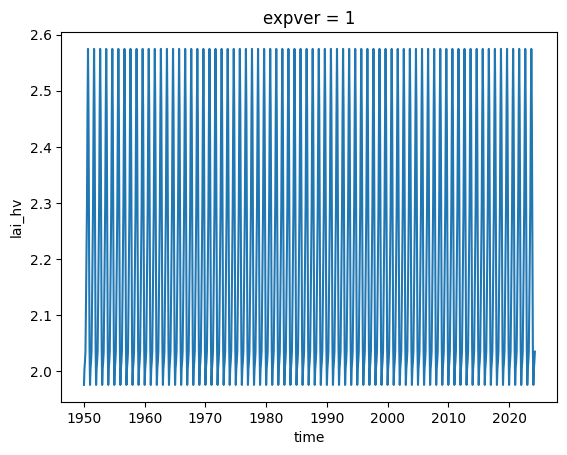

In [61]:
# Plot mean Leaf Area Index
mean_temp = ds.lai_hv.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of Leaf Area Index
ds.lai_hv.std(dim='time').plot()
plt.show()
# Plot median Leaf Area Index over latitude and longitude
ds.lai_hv.median(dim=['latitude', 'longitude']).plot()
plt.show()

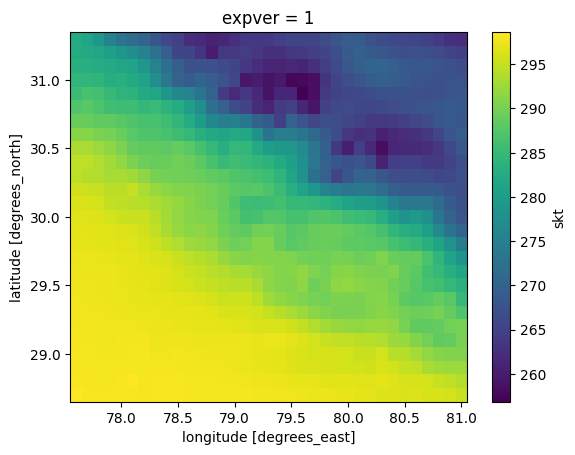

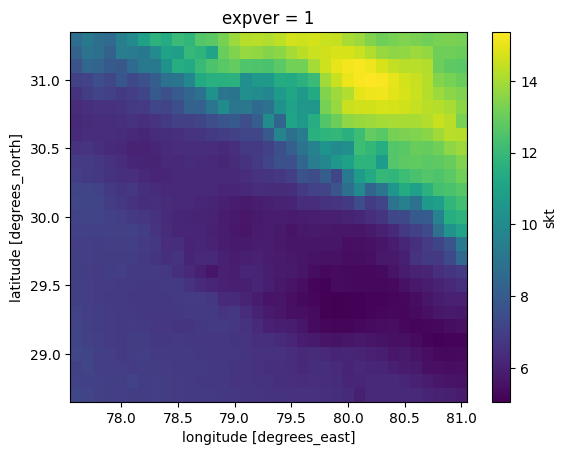

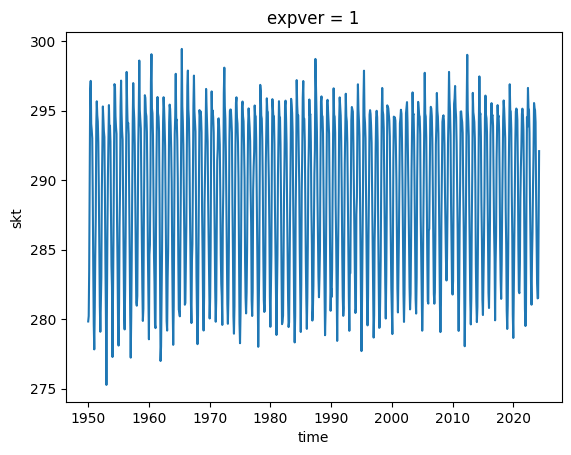

In [62]:
# Plot mean skin temperature
mean_temp = ds.skt.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of skin temperature
ds.skt.std(dim='time').plot()
plt.show()
# Plot median skin temperature over latitude and longitude
ds.skt.median(dim=['latitude', 'longitude']).plot()
plt.show()

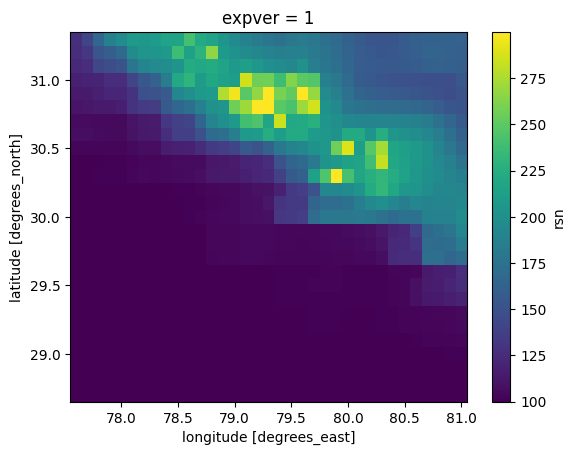

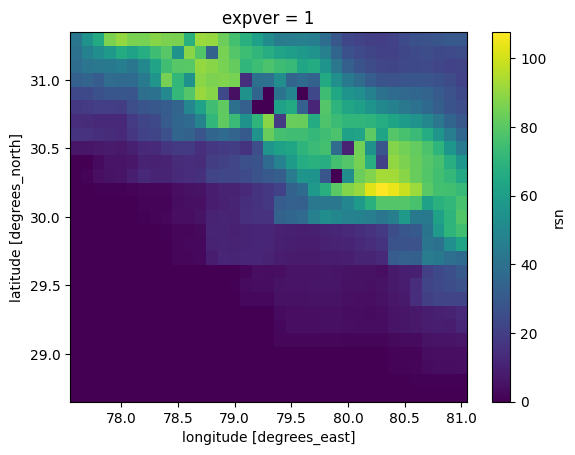

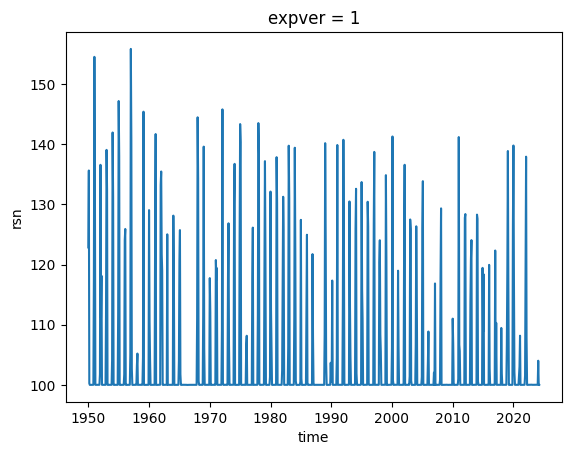

In [63]:
# Plot mean Snow Density
mean_temp = ds.rsn.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of Snow Density
ds.rsn.std(dim='time').plot()
plt.show()
# Plot median Snow Density over latitude and longitude
ds.rsn.median(dim=['latitude', 'longitude']).plot()
plt.show()

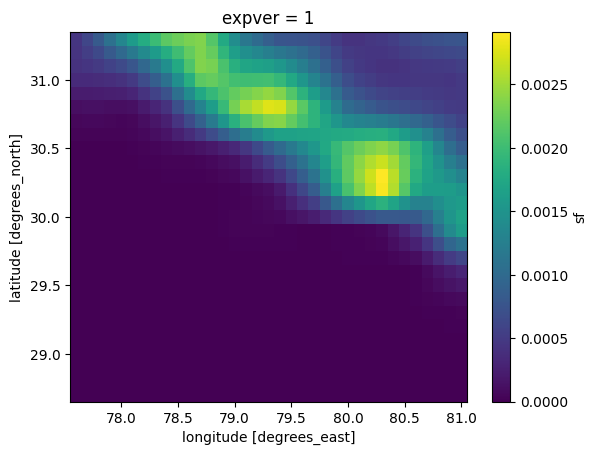

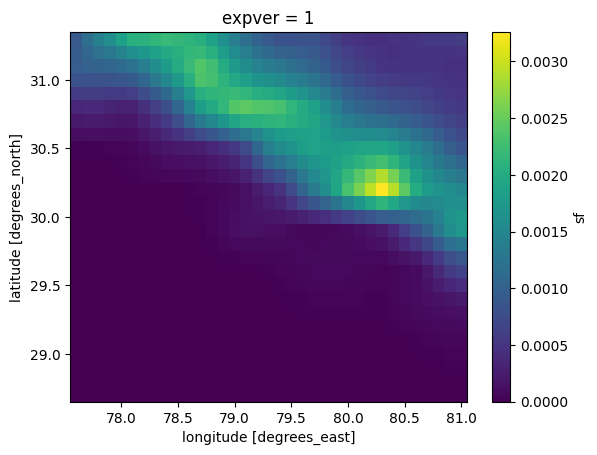

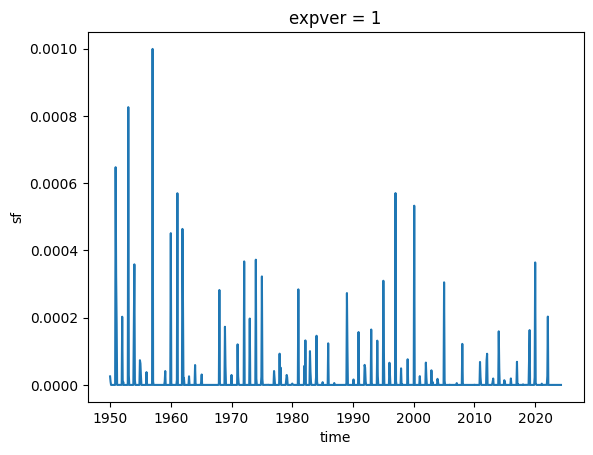

In [64]:
# Plot mean Snow Fall
mean_temp = ds.sf.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of Snow Fall
ds.sf.std(dim='time').plot()
plt.show()
# Plot median Snow Fall over latitude and longitude
ds.sf.median(dim=['latitude', 'longitude']).plot()
plt.show()

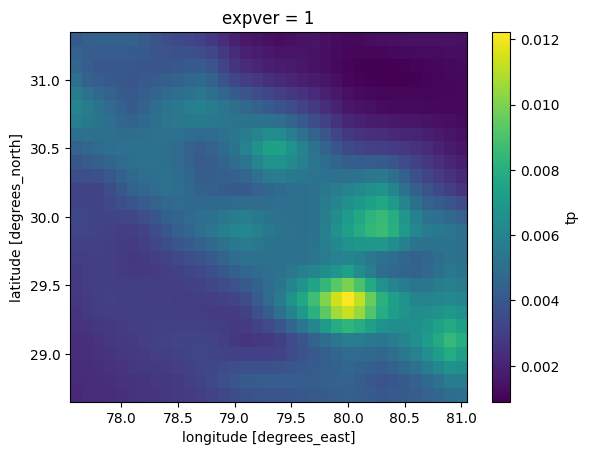

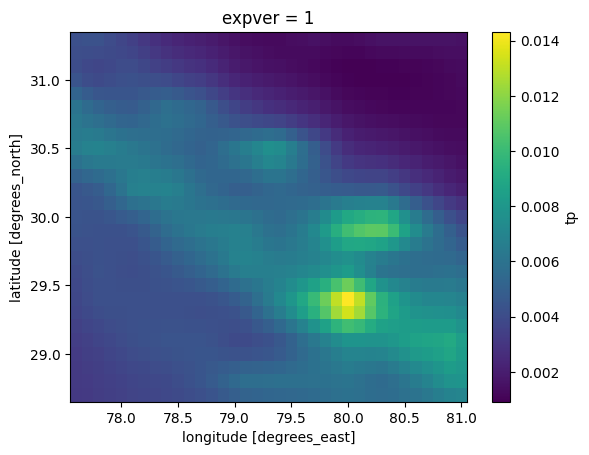

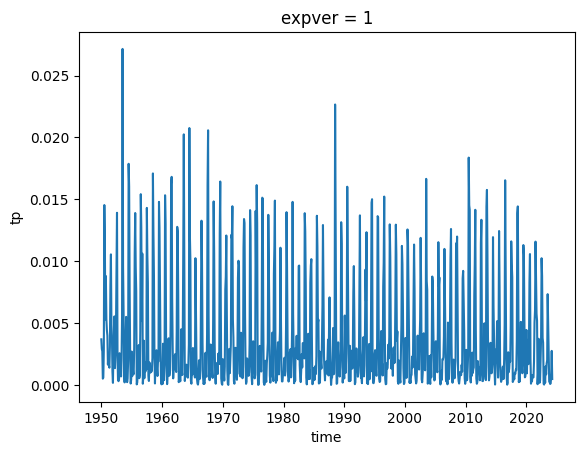

In [65]:
# Plot mean Total Precipitation
mean_temp = ds.tp.mean(dim='time')
mean_temp.plot()
plt.show()

# Plot standard deviation of Total Precipitation
ds.tp.std(dim='time').plot()
plt.show()
# Plot median Total Precipitation over latitude and longitude
ds.tp.median(dim=['latitude', 'longitude']).plot()
plt.show()

# Time Series Analysis

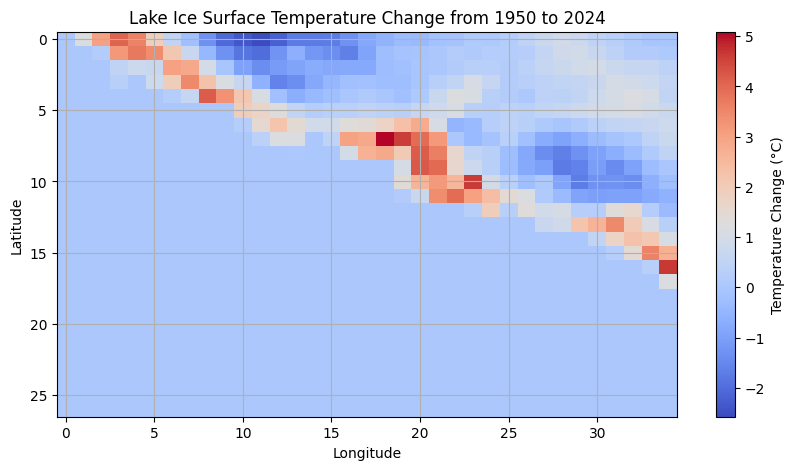

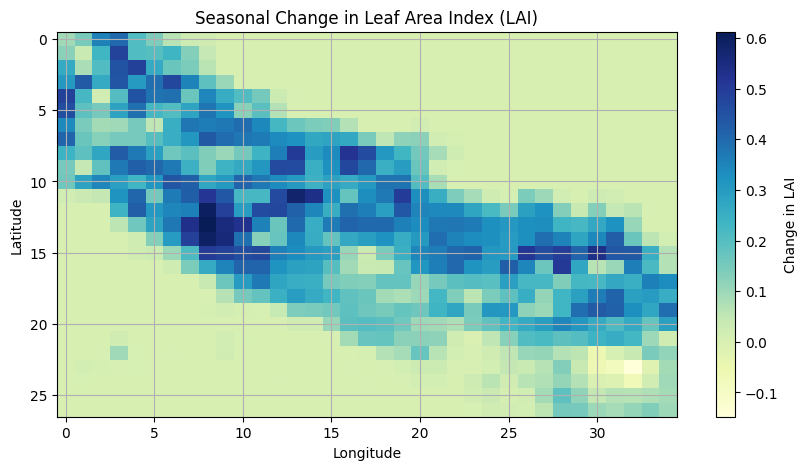

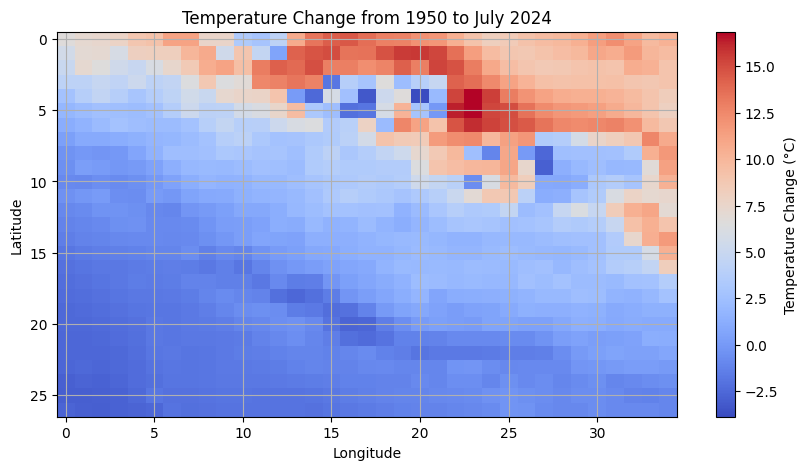

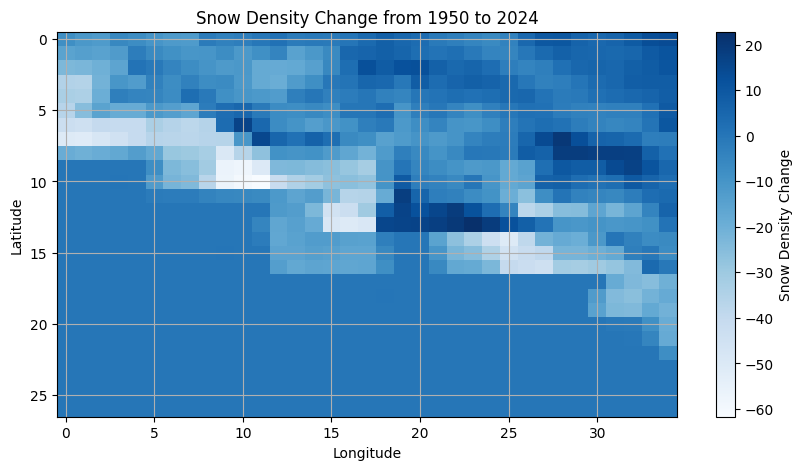

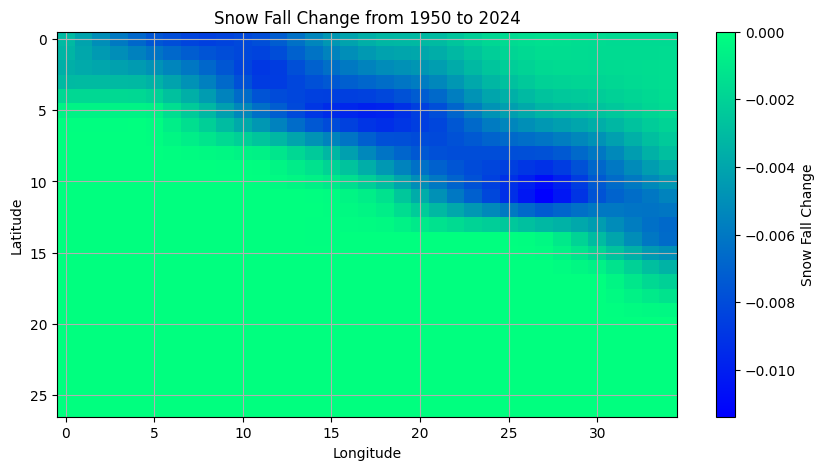

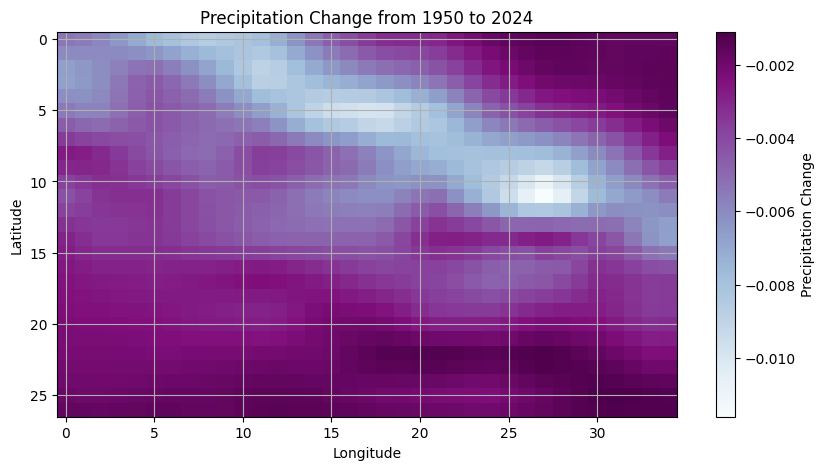

In [76]:
# Define functions for plotting with customization
def plot_variable_change(data, title, cmap='coolwarm', units='', vmin=None, vmax=None):
    plt.figure(figsize=(10, 5))
    img = plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(img, label=units)
    plt.grid(True)
    plt.show()

# Calculate and plot Lake Ice Surface Temperature change over a period
lake_temp_change = ds.lict.sel(time='2024-01-01') - ds.lict.sel(time='1950-01-01')
plot_variable_change(lake_temp_change, 'Lake Ice Surface Temperature Change from 1950 to 2024', cmap='coolwarm', units='Temperature Change (°C)')

# Calculate and plot Seasonal Change in Leaf Area Index (LAI)
sazonal_change_lai = ds.lai_hv.sel(time='2023-07-01') - ds.lai_hv.sel(time='2023-01-01')
plot_variable_change(sazonal_change_lai, 'Seasonal Change in Leaf Area Index (LAI)', cmap='YlGnBu', units='Change in LAI')

# Calculate and plot Temperature change over a period 
temp_change = ds.skt.sel(time='2024-01-01') - ds.skt.sel(time='1950-01-01')
plot_variable_change(temp_change, 'Temperature Change from 1950 to July 2024', cmap='coolwarm', units='Temperature Change (°C)')

# Calculate and plot Snow Density change over a period
snow_density_change = ds.rsn.sel(time='2024-01-01') - ds.rsn.sel(time='1950-01-01')
plot_variable_change(snow_density_change, 'Snow Density Change from 1950 to 2024', cmap='Blues', units='Snow Density Change')

# Calculate and plot Snow Fall change over a period
snow_fall_change = ds.sf.sel(time='2024-01-01') - ds.sf.sel(time='1950-01-01')
plot_variable_change(snow_fall_change, 'Snow Fall Change from 1950 to 2024', cmap='winter', units='Snow Fall Change')

# Calculate and plot Precipitation change over a period
precipitation_change = ds.tp.sel(time='2024-01-01') - ds.tp.sel(time='1950-01-01')
plot_variable_change(precipitation_change, 'Precipitation Change from 1950 to 2024', cmap='BuPu', units='Precipitation Change')
